Starting Hyperparameter Tuning...
Fitting 5 folds for each of 48 candidates, totalling 240 fits

Best Parameters Found: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

--- Model Evaluation ---
Accuracy Score: 0.9825

Confusion Matrix:
[[71  0]
 [ 2 41]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


ROC AUC Score: 0.9974
Visualization plots have been saved as 'svm_confusion_matrix.png' and 'svm_roc_curve.png'.


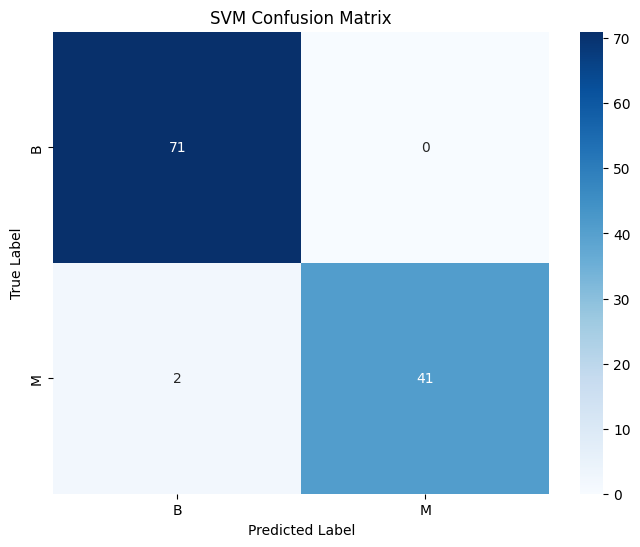

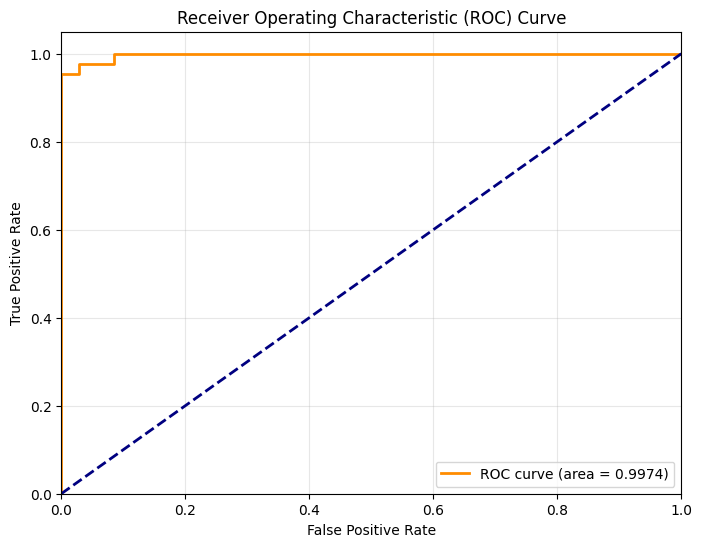

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

# 1. Load the dataset
# Ensure 'data.csv' is in the same directory
df = pd.read_csv('data.csv')

# 2. Data Cleaning
# Dropping the 'id' column and the 'Unnamed: 32' column which contains only NaN values
df = df.drop(columns=['id', 'Unnamed: 32'])

# 3. Encoding the Target Variable
# Converting categorical 'diagnosis' (M/B) to numerical (1/0)
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

# 4. Feature and Target Split
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# 5. Train-Test Split (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Feature Scaling
# SVM is distance-based, so scaling is crucial
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. Hyperparameter Tuning using GridSearchCV
# Testing different values for C, gamma, and different kernel types
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear', 'poly']
}

print("Starting Hyperparameter Tuning...")
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5)
grid.fit(X_train_scaled, y_train)

# Output best parameters
print(f"\nBest Parameters Found: {grid.best_params_}")

# 8. Evaluation
# Use the best model found by GridSearchCV to make predictions
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Print Metrics
print("\n--- Model Evaluation ---")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 9. Visualizations

# A. Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('SVM Confusion Matrix')
plt.savefig('svm_confusion_matrix.png')

# B. ROC Curve
# Using decision_function to get the scores for the ROC curve
y_score = best_model.decision_function(X_test_scaled)
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.savefig('svm_roc_curve.png')

print(f"\nROC AUC Score: {roc_auc:.4f}")
print("Visualization plots have been saved as 'svm_confusion_matrix.png' and 'svm_roc_curve.png'.")